## GSE119668 – effects of circadian dysregulation on tumor growth and underlying mechanisms

- chronic circadian desynchronization promotes phosphorylation of the retinoblastoma (RB) protein, thereby favoring G1/S phase cell cycle progression
- subjected cultured cells to chronic circadian desynchrony (CCD)
- control U2OS cancer cells with 24h synchronized rhythm and jet-lagged group with 8h advanced dex treatment every 2 days (24h/16h cycle)
- https://pubmed.ncbi.nlm.nih.gov/31039152/

In [1]:
import COFE.analyse
import COFE.scpca
import COFE.plot
import numpy as np
import anndata as ad
import pandas as pd
import PCA_func as pc
import matplotlib.pyplot as plt

### Step 1: Open the dataset

In [2]:
path = '/Users/maksimsgolubovics/Python_VScode/Studienprojekt/rnaseq_datasets/GSE119668_rnaseq.h5ad'
adata = ad.read_h5ad(path)

#Transform to DataFrame
data_df = pd.DataFrame(data=adata.X, columns=adata.var.index, index=adata.obs.index).T

#Look at dataset
adata.var[['cond', 'time', 'rep']].head()

,cond,time,rep
GSM3380631,CTL,0,1
GSM3380632,CTL,0,2
GSM3380633,CTL,0,3
GSM3380634,CTL,6,1
GSM3380635,CTL,6,2


### Step 2: Prepare the dataset

In [3]:
data_df_log = np.log10(data_df + 0.1) #Logarithmic transformation

### Step 3: Exploratory analysis

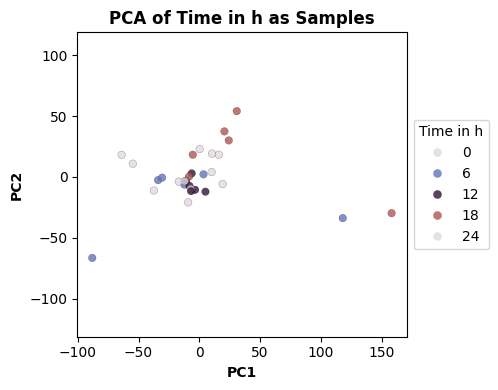

In [4]:
data_df_log_time = data_df_log.join(adata.var['time']).reset_index().set_index('time').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_time, label='Time in h', c_map='twilight')

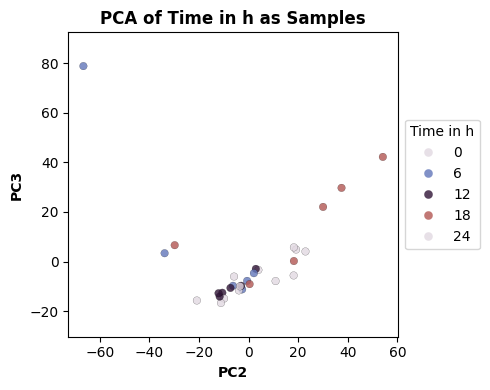

In [6]:
pc.principal_component_2d_timesample(data=data_df_log_time, x=2, y=3, label='Time in h', c_map='twilight')

<Figure size 800x700 with 0 Axes>

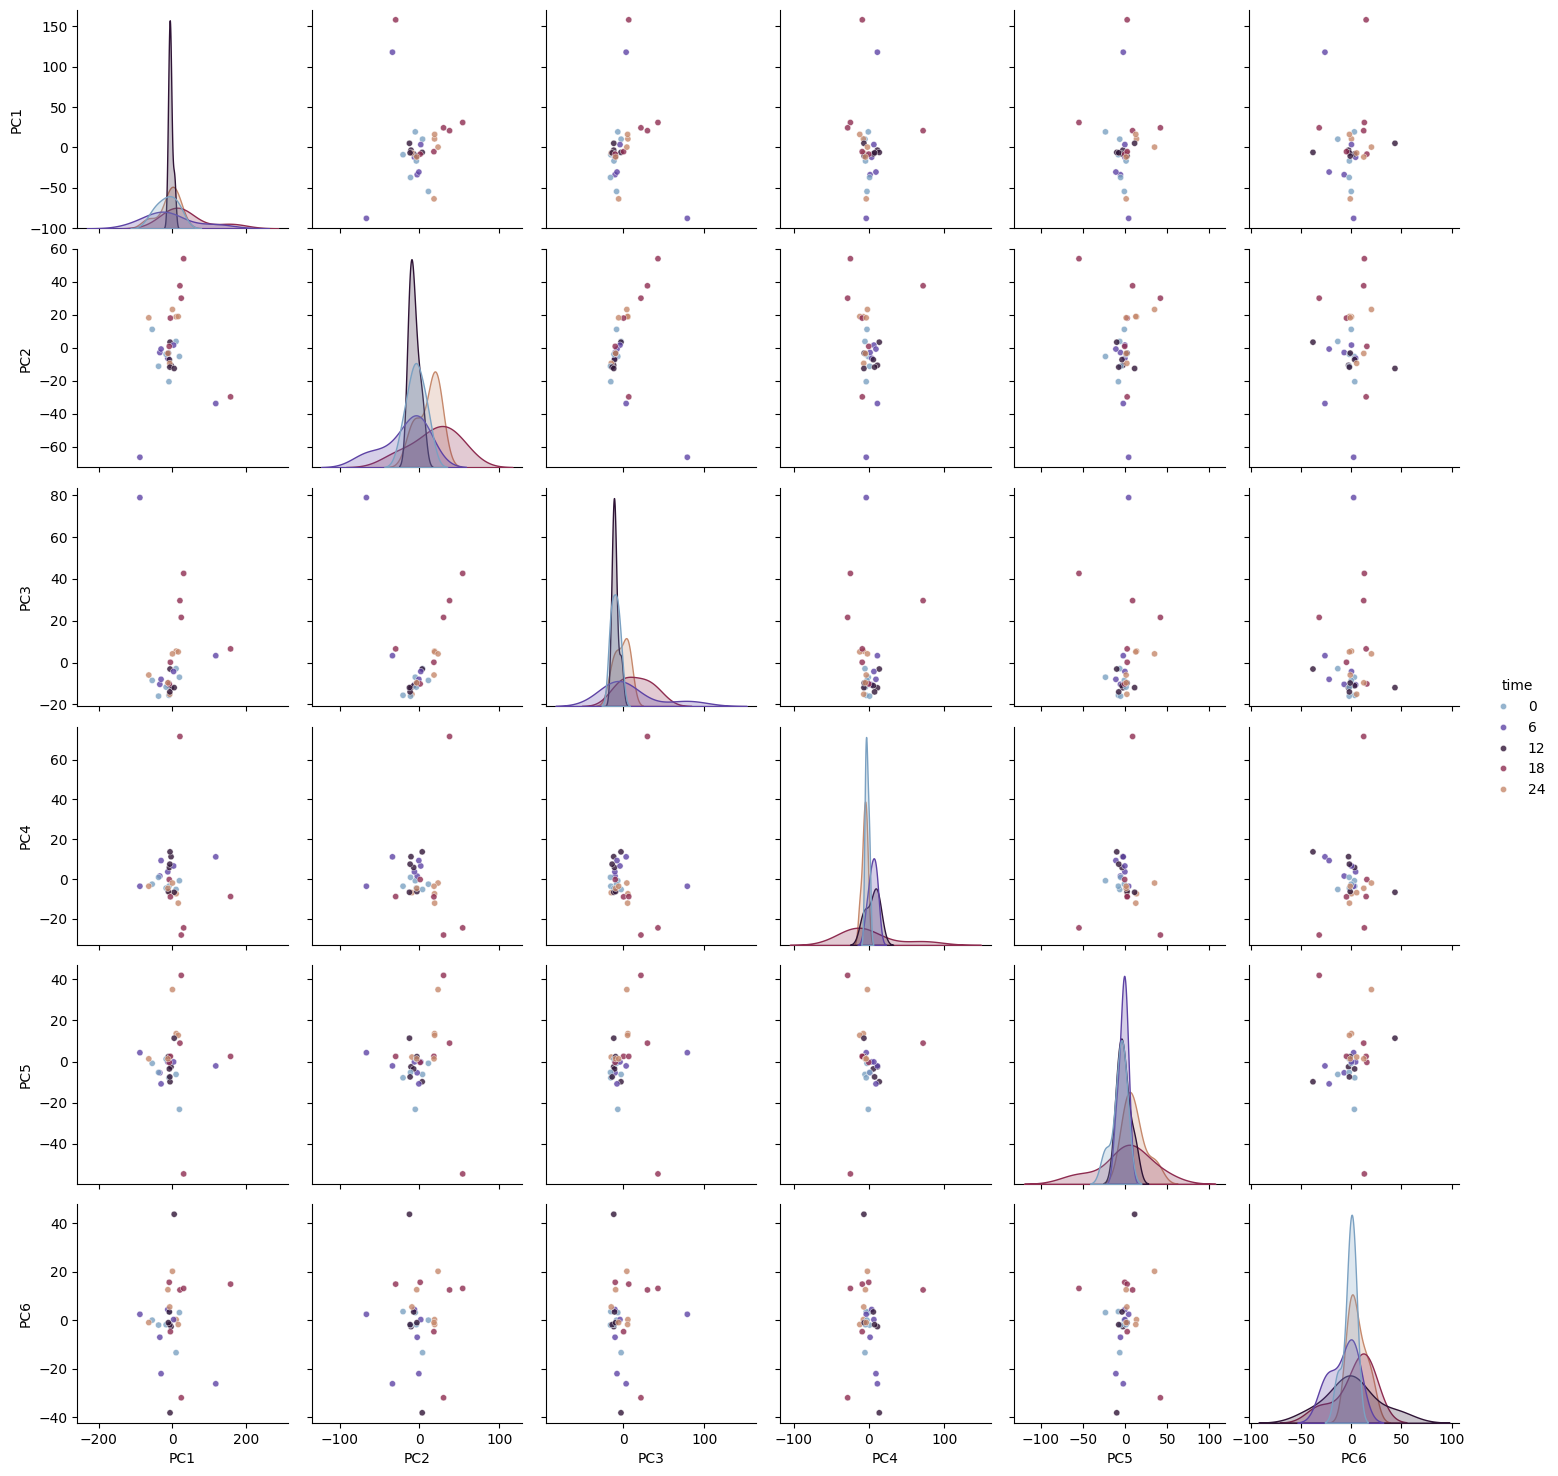

In [5]:
pc.pairplot_psa_6(data=data_df_log_time, palette='twilight')

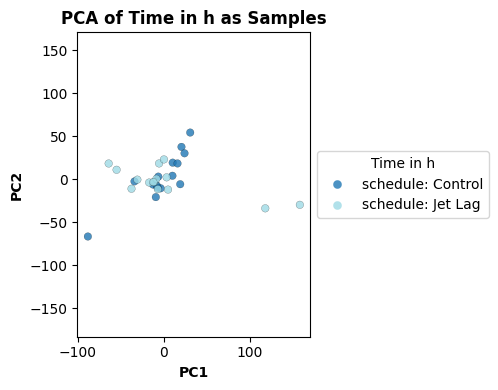

In [7]:
data_df_log_cha = data_df_log.join(adata.var['characteristics_ch1']).reset_index().set_index('characteristics_ch1').drop('index', axis=1)
pc.principal_component_2d_timesample(data=data_df_log_cha, label='Time in h', c_map='tab20')

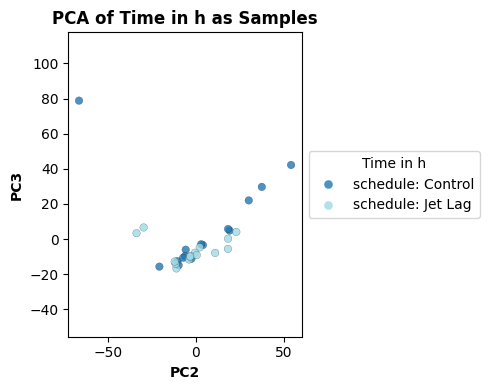

In [8]:
pc.principal_component_2d_timesample(data=data_df_log_cha, x=2, y=3, label='Time in h', c_map='tab20')

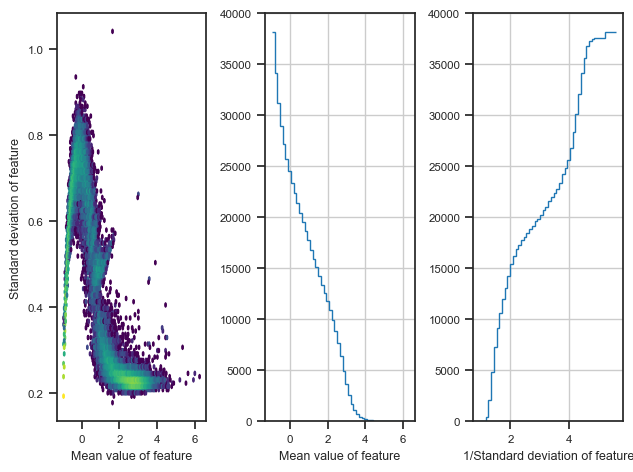

In [ ]:
COFE.plot.plot_diagnostics(data_df_log, feature_dim='col')

### COFE

### Results all samples

In [ ]:
X_train_a = data_df_log
true_time_train_a = adata.var['time'].astype(int)

X_train_a, X_test_a, features_a, features_std_a = COFE.analyse.preprocess_data(X_train_a.to_numpy(), None, 
                                                                           features=X_train_a.columns, feature_dim='col',
                                                                           mean_threshold=1.7, scaling_threshold=4.5)
X_train_a.shape # (Samples, Transcripts)

(30, 7908)

In [211]:
s_choices = np.linspace(1, 40, 15)
cv_a = COFE.analyse.cross_validate(X_train_a, s_choices, features=features_a, K=5, ncores=-1)

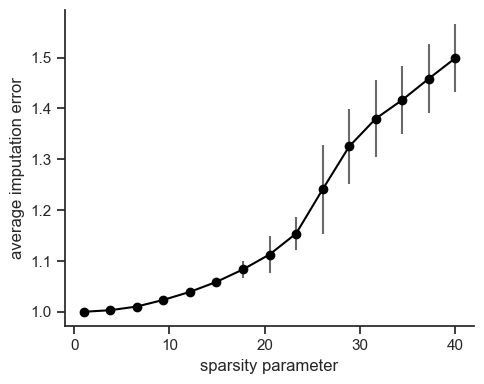

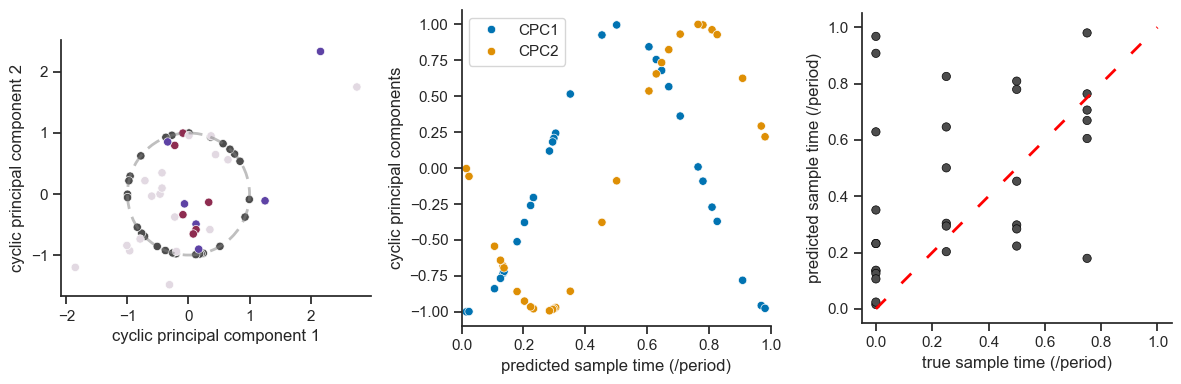

In [212]:
results_train_cancer_a = COFE.analyse.predict_time(X_train_a, cv_a, true_times=true_time_train_a.to_numpy())
COFE.plot.plot_cv_run(results_train_cancer_a, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_cancer_a, time=true_time_train_a.to_numpy(), X=X_train_a, figsize=(12, 4))

In [231]:
results_train_cancer_a["MAPE"]*24

np.float64(3.3851721693444854)

### Results control group

In [ ]:
X_train_c = data_df_log[adata.var['characteristics_ch1'] == 'schedule: Control']
true_time_train_c = adata.var[adata.var['characteristics_ch1'] == 'schedule: Control']['time'].astype(int)

X_train_c, X_test_c, features_c, features_std_c = COFE.analyse.preprocess_data(X_train_c.to_numpy(), None, 
                                                                           features=X_train_c.columns, feature_dim='col',
                                                                           mean_threshold=1.7, scaling_threshold=12.45)
X_train_c.shape # (Samples, Transcripts)

(15, 7957)

In [226]:
s_choices_c = np.linspace(1, 50, 15)
cv_c = COFE.analyse.cross_validate(X_train_c, s_choices_c, features=features_c, K=5, ncores=-1)

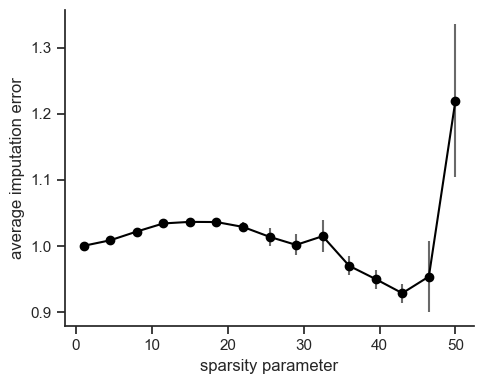

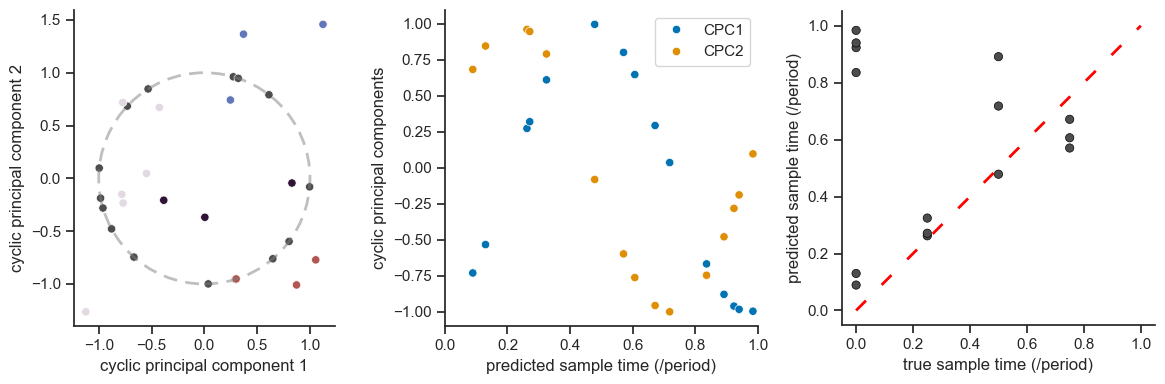

In [228]:
results_train_cancer_c = COFE.analyse.predict_time(X_train_c, cv_c, true_times=true_time_train_c.to_numpy())
COFE.plot.plot_cv_run(results_train_cancer_c, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_cancer_c, time=true_time_train_c.to_numpy(), X=X_train_c, figsize=(12, 4))

In [238]:
results_train_cancer_c["MAPE"]*24

np.float64(1.889439521873154)

### Results jag lag group

In [ ]:
X_train_d = data_df_log[adata.var['characteristics_ch1'] == 'schedule: Jet Lag']
true_time_train_d = adata.var[adata.var['characteristics_ch1'] == 'schedule: Jet Lag']['time'].astype(int)

X_train_d, X_test_d, features_d, features_std_d = COFE.analyse.preprocess_data(X_train_d.to_numpy(), None, 
                                                                           features=X_train_d.columns, feature_dim='col',
                                                                           mean_threshold=1.7, scaling_threshold=3.325)
X_train_d.shape # (Samples, Transcripts)

(15, 7933)

In [260]:
s_choices_d = np.linspace(1, 50, 15)
cv_d = COFE.analyse.cross_validate(X_train_d, s_choices_d, features=features_d, K=5, ncores=-1)

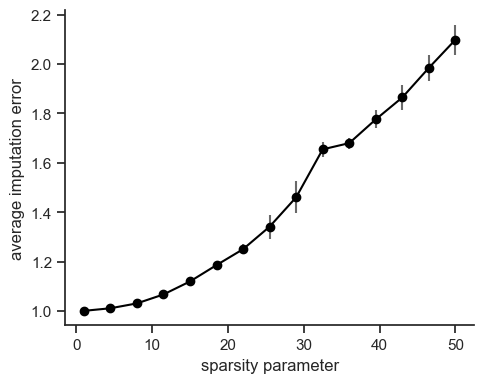

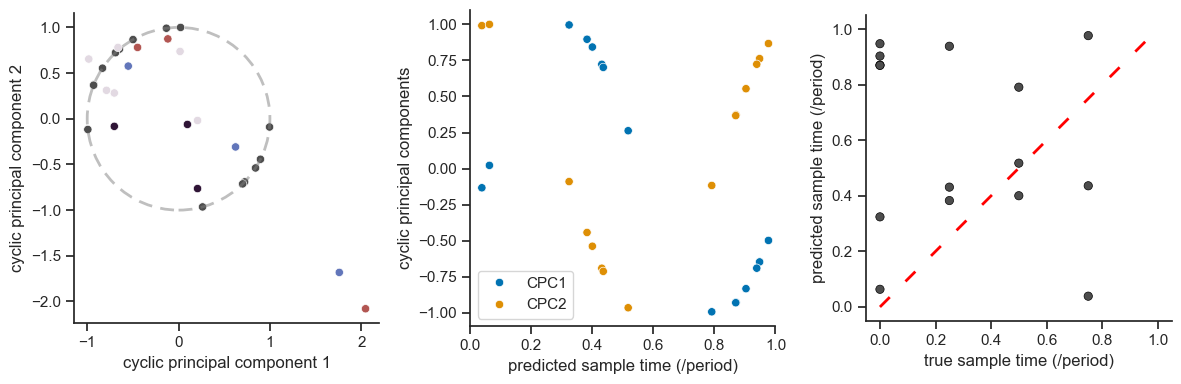

In [261]:
results_train_cancer_d = COFE.analyse.predict_time(X_train_d, cv_d, true_times=true_time_train_d.to_numpy())
COFE.plot.plot_cv_run(results_train_cancer_d, figsize=(5,4))
COFE.plot.plot_circular_ordering(results_train_cancer_d, time=true_time_train_d.to_numpy(), X=X_train_d, figsize=(12, 4))

In [262]:
results_train_cancer_d["MAPE"]*24

np.float64(3.193600355396006)

## Conclusion

As expected, COFE did not show an accurate prediction when all samples were used. This is because half of the samples have a disturbed circadian clock and their cycle is about 8 hours shorter. So if we look at the result of the Jett-Lag group in isolation, there is no accurate prediction, however COFE predicts the time of the control group fairly accurately for such a small group size.